### Continous random variables

- Check: https://nbviewer.org/github/marsgr6/EN-online/blob/main/continuous_distributions.ipynb

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Probability density function

$$PDF(X) = f(x) = \frac{x^2}{3}, -1 < x < 2$$

$$\int_{-\infty}^{\infty} f(x) dx = 1$$

$$\int_{-1}^{2} \frac{x^2}{3} dx = \frac{x^3}{9} |_{-1}^{2} = \frac{2^3}{9} - \frac{(-1)^3}{9} =  1$$

$$P(0 \leq X\leq 1) = \int_{0}^{1} \frac{x^2}{3} dx = 1/9$$

(0.1111111111111111, 0.11111116677794466)

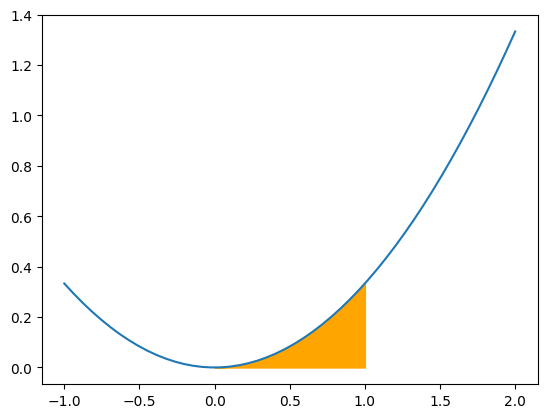

In [ ]:
f = lambda x:  x**2 / 3  # This is the PDF
x = np.linspace(-1, 2)  # Evaluate the interval
plt.plot(x, f(x))  # This the PDF Curve
x_prob = np.linspace(0, 1, 1000)  # This is for 1000 strapz 
plt.fill_between(x_prob, f(x_prob), color="orange")
1/9, np.trapz(f(x_prob), x_prob)

$$P(X=x) = 0$$

$$P(X=0.5) = 0$$

0.0

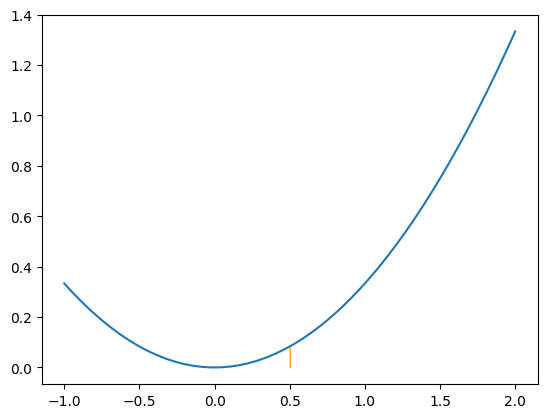

In [ ]:
plt.plot(x, f(x))
x_prob = np.linspace(0.5, 0.5, 1000)
plt.fill_between(x_prob, f(x_prob), color="orange")
np.trapz(f(x_prob), x_prob)

### Commulative distribution function

$$CDF:\ F(X) = P(X\leq x) = \int_{-\infty}^{x} f(t) dt$$

$$F(X) = \int_{-1}^{x} t^2 / 3 dt = t^3/9 |_{-1}^{x} = x^3/9 + 1/9$$

$$P(0 \leq X\leq 1) = \int_{0}^{1} \frac{x^2}{3} dx = 1/9$$

$$P(0 \leq X\leq 1) = F(1) - F(0)$$

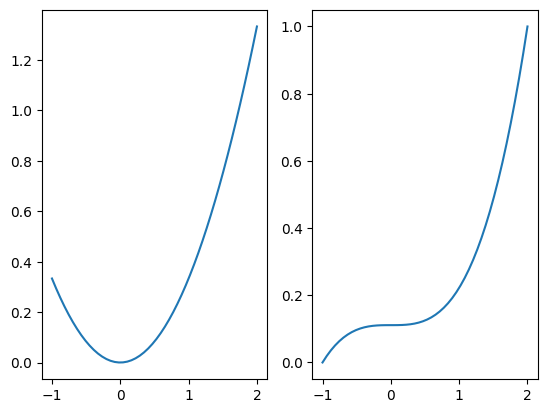

In [ ]:
F = lambda x: x**3/9 + 1/9
plt.subplot(1,2,1)
plt.plot(x, f(x))
plt.subplot(1,2,2)
plt.plot(x, F(x))

### Expected value and variance of a continous random variable 

$$ E[X] = \int_{-\infty}^{\infty} x \cdot f(x) dx $$

$$ E[X] = \int_{-1}^{2} x * x^2/3 dx = x^4/12 |_{-1}^{2} = 2^4/12 - (-1)^4/12 = 15/12$$

$$ E[X^2] = \int_{-1}^{2} x^2 * x^2/3 dx = x^5/15 |_{-1}^{2} = 2^5/15 - (-1)^5/15 = 32/15 + 1/15 = 33/15$$

$$Var[X] =  E[X^2] -  (E[X])^2 = 33/15 - (15/12)^2$$

In [ ]:
15/12, 33/15 - (15/12)**2

(1.25, 0.6375000000000002)

### Inverse of the CDF (Quantile function)

$$F^{-1}(u) \rightarrow (9u-1)^{1/3}$$

### Inverse transform sampling method

$$u = (x^3+1)/9 \rightarrow (9u-1)^{1/3} = x$$

- Check: https://en.wikipedia.org/wiki/Quantile_function

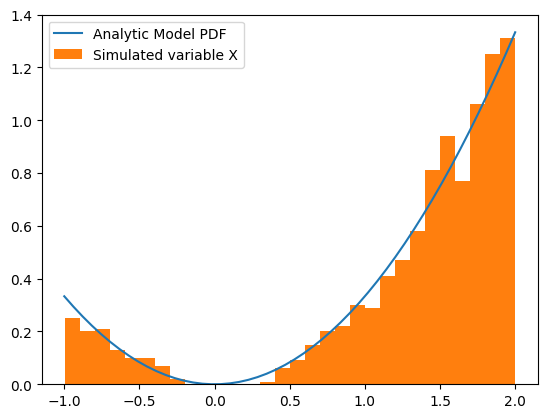

In [ ]:
# Implement ITS, calculate mean and variance
I = lambda u: np.cbrt(9*u - 1)

U = np.random.random(size=1000)
X = I(U)  # This is my random variable X with PDF x**2/3 (0,1)

plt.plot(x, f(x), label="Analytic Model PDF")  # Analytic Model PDF
plt.hist(X, density=True, bins=30, label="Simulated variable X");
plt.legend()

### Rejection method (review hit and miss Monte Carlo)

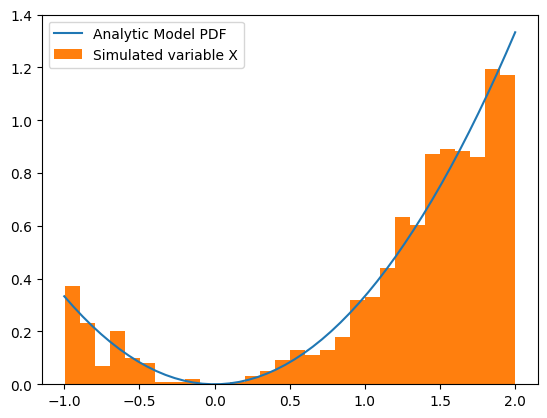

In [ ]:
# Implement rejection method

a, b, c = -1, 2, 2
size = 1000  # size of X

X = []
while True:
    xr, yr = np.random.random(size=2)
    xr = xr*(b-a) + a
    yr = yr*c
    if yr < f(xr):  # Accept
        X += [xr]
    if len(X) == size: break

plt.plot(x, f(x), label="Analytic Model PDF")  # Analytic Model PDF
plt.hist(X, density=True, bins=30, label="Simulated variable X");
plt.legend()

In [ ]:
xr, yr, f(xr), yr < f(xr)

(0.1460955235750645, 0.14225853397779975, 0.007114634002890742, False)

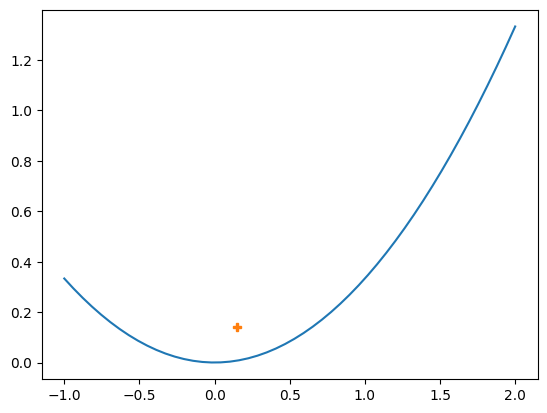

In [ ]:
plt.plot(x, f(x), label="Analytic Model PDF")  # Analytic Model PDF
plt.plot(xr, yr, 'P')

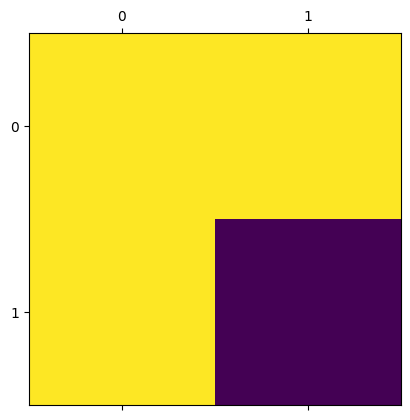

In [ ]:
from scipy.stats import bernoulli

plt.matshow(bernoulli.rvs(p=0.5, size=(2,2)))

In [ ]:
v1 = bernoulli.rvs(p=0.5, size=5)
v2 = bernoulli.rvs(p=0.5, size=5)
v1, v2

(array([1, 1, 1, 1, 0]), array([1, 1, 1, 1, 1]))

In [ ]:
hd = 1/5
hd 

0.2

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6270f206-ff88-4533-afc5-e2a8c2de37fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>